In [3]:
# Some boilerplate
options(digits = 4)
options(repos="http://cran.us.r-project.org")


Definamos las variables acústico-prosódicas que nos interesan junto a las variables sociales.

In [1]:
ap_vars <- c(
  "ENG_MAX",
  "ENG_MEAN",
  "F0_MEAN",
  "F0_MAX"
  # "NOISE_TO_HARMONICS_RATIO",
  # "PHONEMES_AVG",
  # "PHONEMES_COUNT",
  # "SOUND_VOICED_LOCAL_SHIMMER",
  # "SYLLABES_AVG",
  # "SYLLABES_COUNT",
  # "VCD2TOT_FRAMES"
)

social_vars <- c(
  "bored_with_game",
  "difficult_for_partner_to_speak" ,
  "contributes_to_successful_completion",
  "engaged_in_game",
  "gives_encouragement",
  "making_self_clear",
  "planning_what_to_say",
  "dislikes_partner")



Hagamos un plot, para cada variable a/p, de las distinas variables sociales en función del entrainment; es decir, siendo $X=entrainment$ y $Y=engaged\_in\_game$. Agreguemos a ésto la regresión lineal obtenida de estos datos.

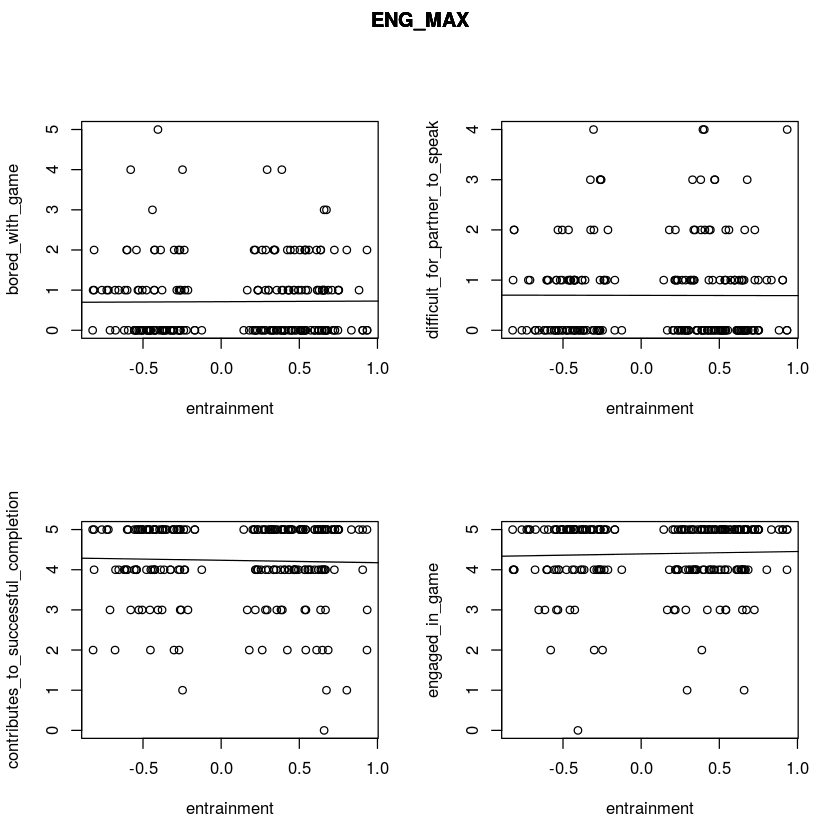

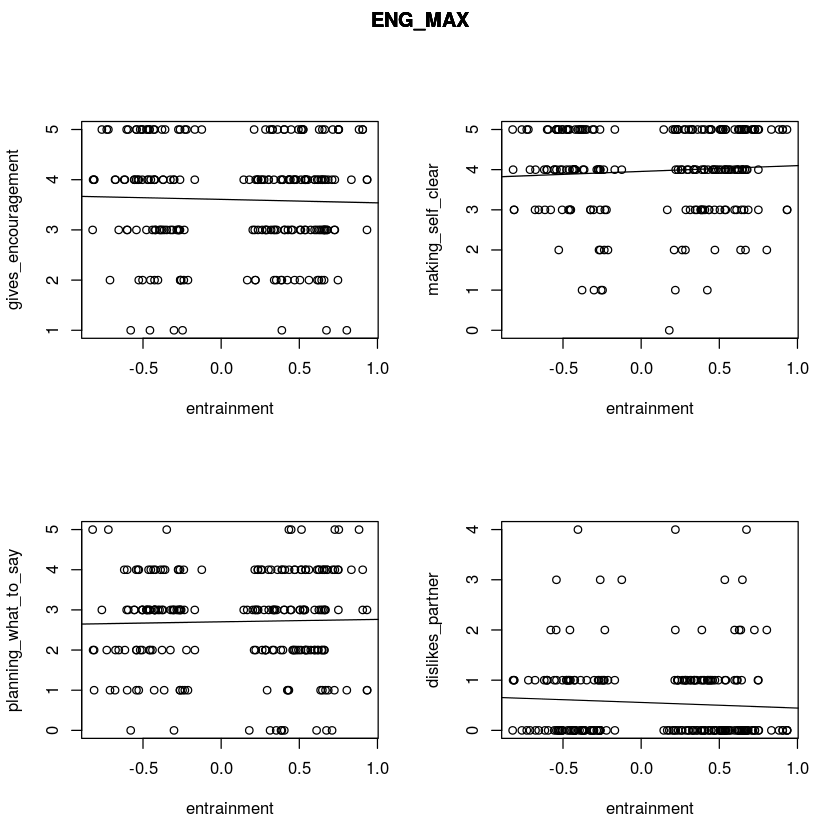

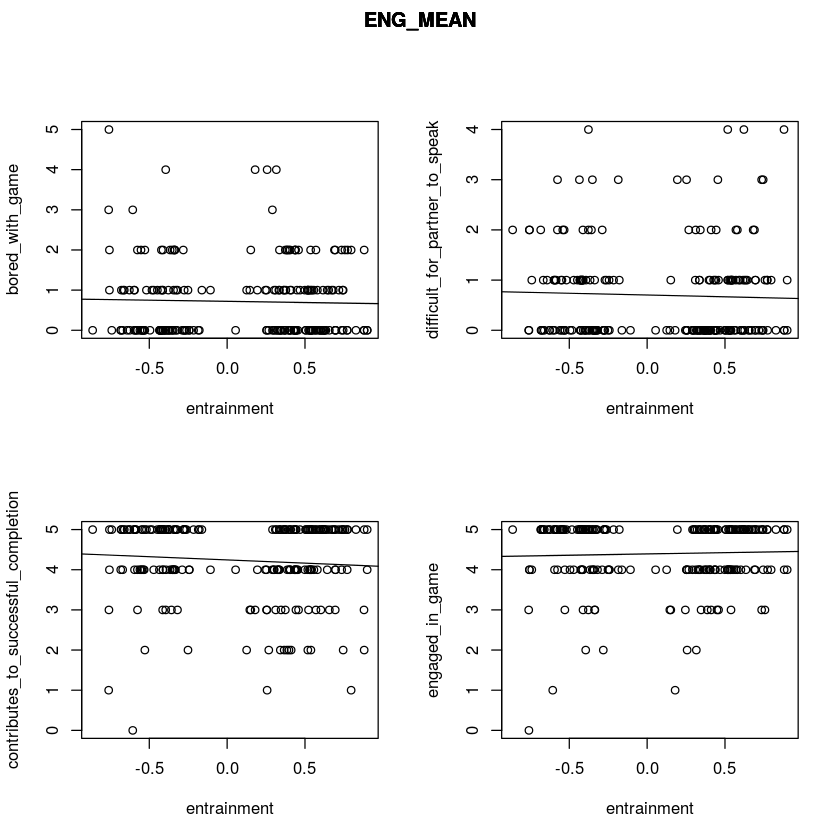

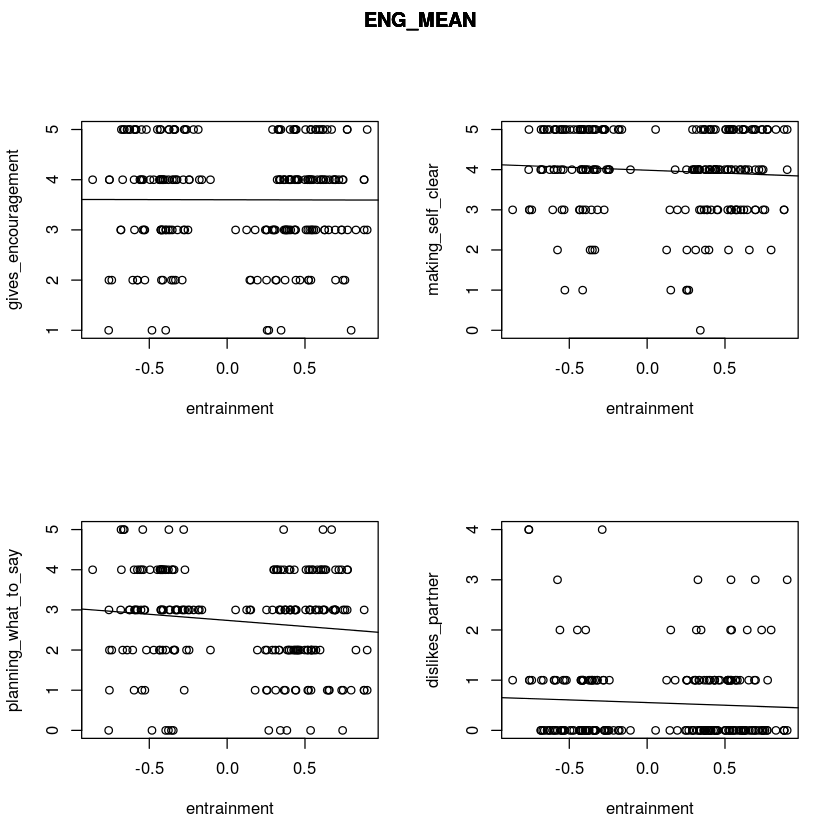

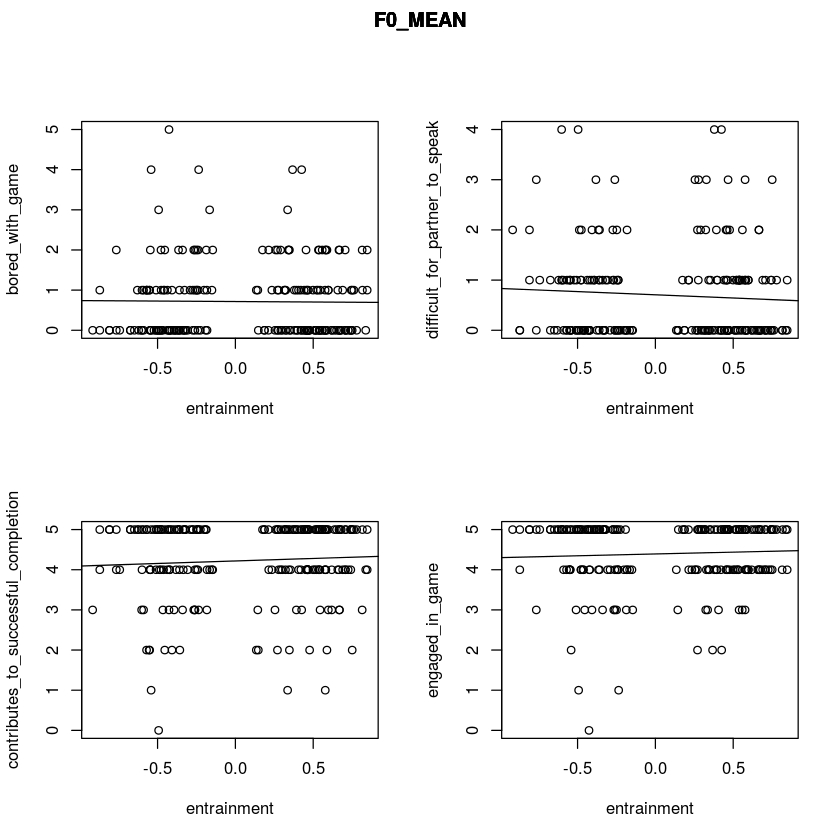

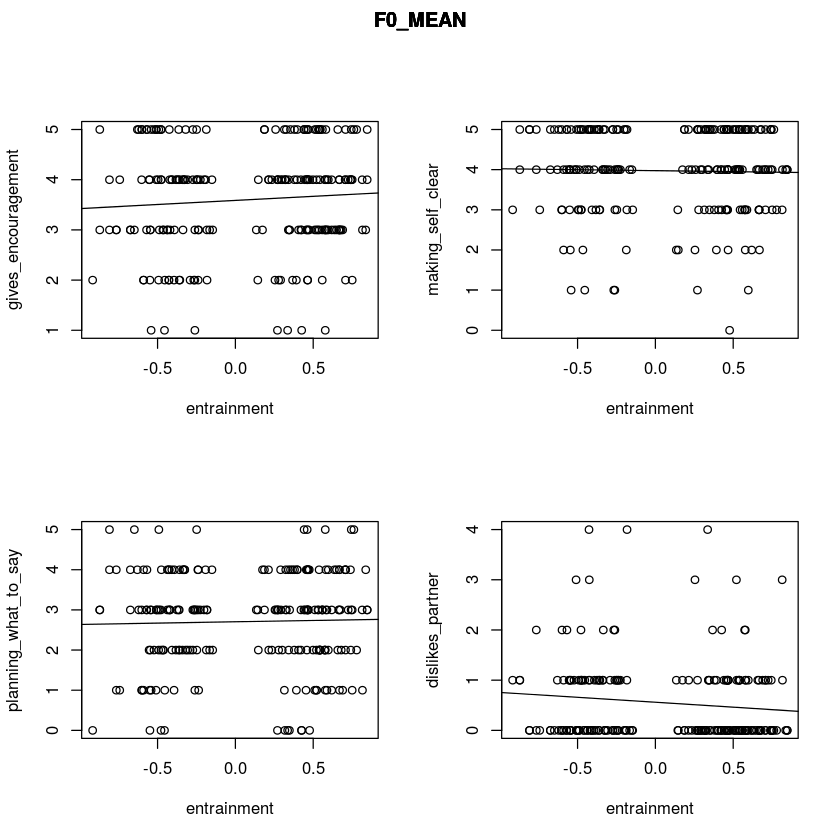

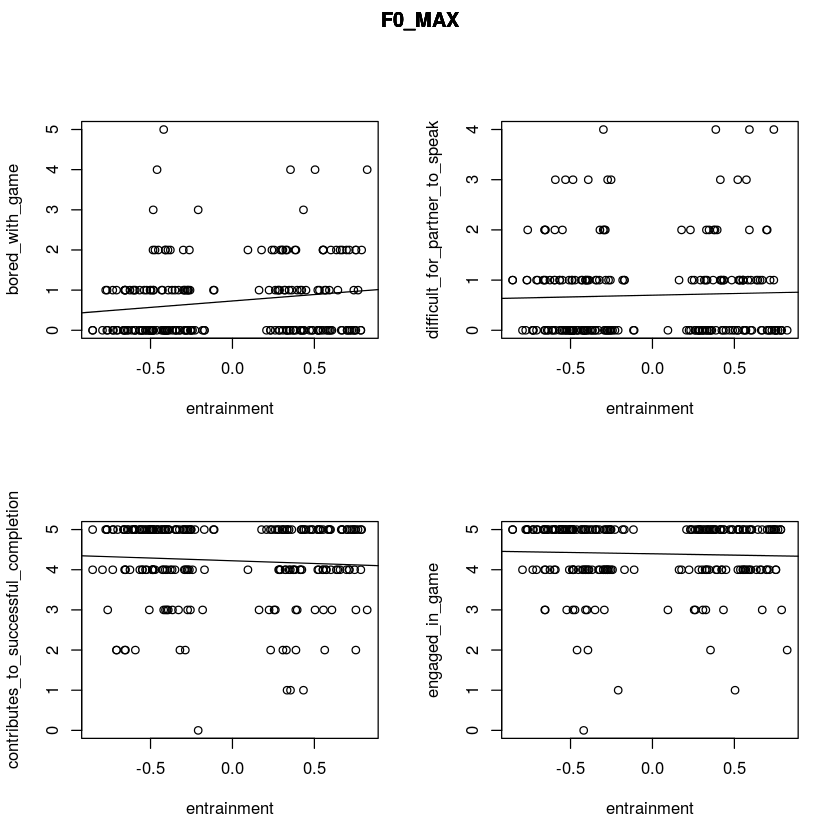

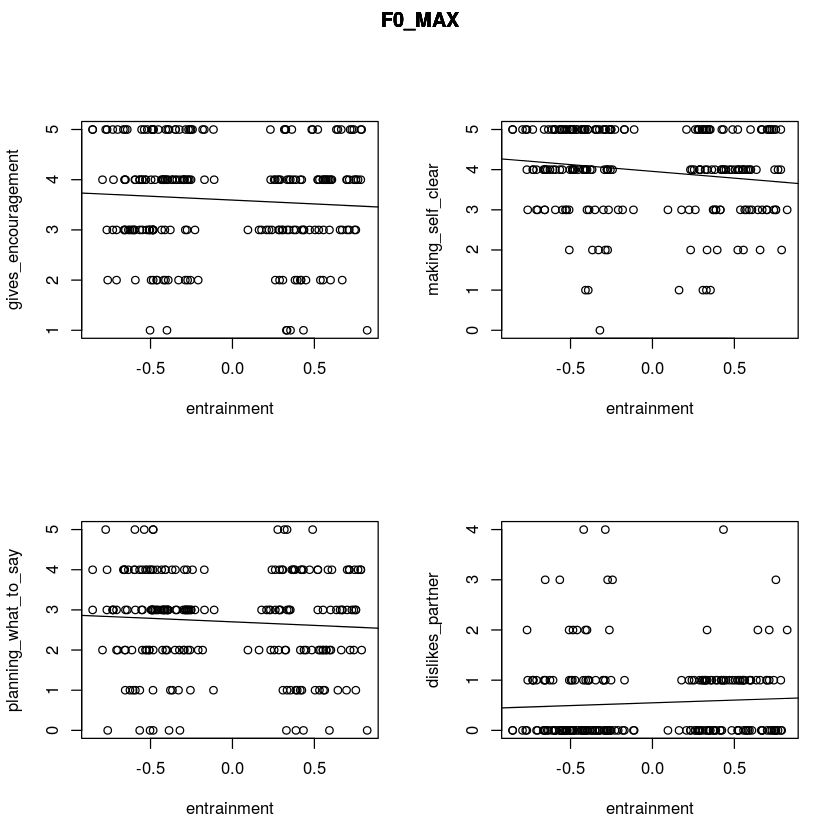

In [8]:
get_ap_csv <- function(ap_var) {
    path <- paste("tables/", ap_var, ".csv", sep="")
    dat <- read.csv(path)
    dat["abs_entrainment"] <- abs(dat["entrainment"])
    return (dat)
}

for (ap_var in ap_vars) {
    dat <- get_ap_csv(ap_var)

    par(mfrow=c(2,2), oma=c(0,0,2,0))
    i = 1;

    while ( i <= length(social_vars)) {
        social_var <- social_vars[i]
        subdat <- dat[c("entrainment", social_var)]
        
        
        plot(subdat)
        # 
        regression <- lm(paste(social_var, " ~ entrainment", sep=""), data=dat) 
        abline(regression)
        
        title(ap_var, outer=TRUE)
        if (i == 4) {
          par(mfrow=c(2,2))
        }
        i <- i + 1
    }
}
